# **Imports**

In [3]:
# pip install keras_tuner

In [4]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam, SGD
import keras_tuner as kt
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf


In [5]:
keras.backend.clear_session()
np.random.seed(1)
tf.random.set_seed(1)

# **Load Data**

In [6]:
X = pd.read_csv("sider_global_cdf_rdkit.csv")
X = X.drop("('RDKit2DNormalized_calculated', <class 'bool'>)",axis = 1)

si = SimpleImputer(missing_values=np.nan,strategy="mean")
X = si.fit_transform(X)

y = pd.read_csv("sider (1).csv")
y = y["Hepatobiliary disorders"]



# **GS**

In [ ]:
X_trainval, X_test, y_trainval, y_test= train_test_split(X, y, test_size = 0.05, random_state = 1)
X_train,X_val , y_train, y_val = train_test_split(X_trainval, y_trainval, test_size = 0.05, random_state = 1)

### **Create Model for Grid Search**


**2 hidden layers**

In [ ]:
# #2 hidden layers
# def create_model_for_GS(optimizer = 'Adam', activation_1 = 'relu',activation_2= 'relu', init_mode_1 = 'uniform',init_mode_3 = 'uniform',init_mode_2 = 'uniform', dropout_rate_1 = 0.0 , dropout_rate_2 = 0.0, neurons_1 = 50,neurons_2 = 50):
#     model = Sequential()
    
#     model.add(Dense(neurons_1, kernel_initializer = init_mode_1, activation = activation_1, input_shape = [200]))
#     model.add(Dropout(dropout_rate_1))
#     model.add(Dense(neurons_2, kernel_initializer = init_mode_2, activation = activation_2))
#     model.add(Dropout(dropout_rate_2))
#     model.add(Dense(1, kernel_initializer = init_mode_3, activation="sigmoid"))

#     model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

#     return model

**1 hidden layer**

In [ ]:
#1 hidden layers
def create_model_for_GS(optimizer = 'Adam', activation_h = 'relu', init_mode_h = 'uniform',init_mode_o = 'uniform', dropout_rate_h = 0.0 , neurons_h = 50):
    model = Sequential()
    
    model.add(Dense(neurons_h, kernel_initializer = init_mode_h, activation = activation_h, input_shape = [200]))
    model.add(Dropout(dropout_rate_h))
    model.add(Dense(1, kernel_initializer = init_mode_o, activation="sigmoid"))

    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

    return model

### **Grid Search**

**2 hidden layers**

In [ ]:
# model_for_GS = KerasClassifier(build_fn = create_model_for_GS, epochs = 50, batch_size = 10)

#batch_size = [10, 30, 60, 80, 100]
#epochs = [10, 50, 100]
#optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
#activation_1 = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
#activation_2 = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
# init_mode_1 = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
# init_mode_2 = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
# init_mode_3 = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
#dropout_rate_1 = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
#dropout_rate_2= [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
#neurons_1 = [50, 100, 200, 300, 400]
#neurons_2 = [50, 100, 200, 300, 400]

# param_grid = dict(init_mode_1 = init_mode_1,init_mode_2=init_mode_2,init_mode_3=init_mode_3)
# grid = GridSearchCV(estimator = model_for_GS, param_grid = param_grid, cv = 5)
# grid_result = grid.fit(X_trainval, y_trainval)

# print(f"Best mean cross-validation score: {grid_result.best_score_} using {grid_result.best_params_}")
# print(f"test set score: {grid_result.score(X_test,y_test)}")

**1 hidden layer**

In [ ]:
# model_for_GS = KerasClassifier(build_fn = create_model_for_GS, epochs = 50, batch_size = 10)

# batch_size = [10, 30, 60, 80, 100]
# epochs = [10, 50, 100]
# optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
# activation_h = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
# init_mode_h = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
# init_mode_o = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
# dropout_rate_h = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
# neurons_h = [50, 100, 200, 300, 400]

# param_grid = dict()
# grid = GridSearchCV(estimator = model_for_GS, param_grid = param_grid, cv = 5)
# grid_result = grid.fit(X_trainval, y_trainval)

# print(f"Best mean cross-validation score: {grid_result.best_score_} using {grid_result.best_params_}")
# print(f"test set score: {grid_result.score(X_test,y_test)}")

In [ ]:
# model_for_GS = KerasClassifier(build_fn = create_model_for_GS, epochs = 50)

# optimizer = ['SGD', 'Adam']
# init_mode_h = ['uniform', 'normal']
# init_mode_o = ['uniform','normal']
# dropout_rate_h = [0.1,0.2,0.4]
# neurons_h = [100,300,500]

# param_grid = dict(optimizer=optimizer,init_mode_h=init_mode_h,init_mode_o=init_mode_o,dropout_rate_h=dropout_rate_h,neurons_h=neurons_h)
# grid = GridSearchCV(estimator = model_for_GS, param_grid = param_grid, cv = 5)
# grid_result = grid.fit(X_trainval, y_trainval)

# print(f"Best mean cross-validation score: {grid_result.best_score_} using {grid_result.best_params_}")
# print(f"test set score: {grid_result.score(X_test,y_test)}")

In [ ]:
model_for_GS = KerasClassifier(build_fn = create_model_for_GS, epochs = 50)

optimizer = ['SGD', 'Adam']
# init_mode_h = ['uniform', 'normal']
# init_mode_o = ['uniform','normal']
# dropout_rate_h = [0.1,0.2,0.4]
neurons_h = [100,300,500]

param_grid = dict(optimizer=optimizer,neurons_h=neurons_h)
grid = GridSearchCV(estimator = model_for_GS, param_grid = param_grid, cv = 5)
grid_result = grid.fit(X_trainval, y_trainval)

print(f"Best mean cross-validation score: {grid_result.best_score_} using {grid_result.best_params_}")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


Epoch 1/50
34/34 [==============================] - 1s 2ms/step - loss: 0.6915 - accuracy: 0.5286
Epoch 2/50
34/34 [==============================] - 0s 2ms/step - loss: 0.6909 - accuracy: 0.5258
Epoch 3/50
34/34 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.5240
Epoch 4/50
34/34 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.5268
Epoch 5/50
34/34 [==============================] - 0s 2ms/step - loss: 0.6893 - accuracy: 0.5240
Epoch 6/50
34/34 [==============================] - 0s 2ms/step - loss: 0.6887 - accuracy: 0.5314
Epoch 7/50
34/34 [==============================] - 0s 2ms/step - loss: 0.6882 - accuracy: 0.5387
Epoch 8/50
34/34 [==============================] - 0s 2ms/step - loss: 0.6876 - accuracy: 0.5480
Epoch 9/50
34/34 [==============================] - 0s 2ms/step - loss: 0.6870 - accuracy: 0.5415
Epoch 10/50
34/34 [==============================] - 0s 2ms/step - loss: 0.6864 - accuracy: 0.5517
Epoch 11/50
34/34 [

In [ ]:
print(f"test set score: {grid_result.score(X_test,y_test)}")

3/3 [==============================] - 0s 5ms/step - loss: 0.7436 - accuracy: 0.7500
test set score: 0.75


In [ ]:
#1 hidden layers
def create_model_for_GS(optimizer = 'Adam', activation_h = 'relu', init_mode_h = 'uniform',init_mode_o = 'uniform', dropout_rate_h = 0.0 , neurons_h = 300):
    model = Sequential()
    
    model.add(Dense(neurons_h, kernel_initializer = init_mode_h, activation = activation_h, input_shape = [200]))
    model.add(Dropout(dropout_rate_h))
    model.add(Dense(1, kernel_initializer = init_mode_o, activation="sigmoid"))

    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

    return model

In [ ]:
model_for_GS = KerasClassifier(build_fn = create_model_for_GS, epochs = 50)

init_mode_h = ['uniform', 'normal']
init_mode_o = ['uniform','normal']
dropout_rate_h = [0.0,0.1,0.2,0.4]

param_grid = dict(init_mode_h=init_mode_h,init_mode_o=init_mode_o,dropout_rate_h=dropout_rate_h)
grid = GridSearchCV(estimator = model_for_GS, param_grid = param_grid, cv = 5)
grid_result = grid.fit(X_trainval, y_trainval)

print(f"Best mean cross-validation score: {grid_result.best_score_} using {grid_result.best_params_}")

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


Streaming output truncated to the last 5000 lines.
34/34 [==============================] - 0s 4ms/step - loss: 0.3234 - accuracy: 0.8782
Epoch 27/50
34/34 [==============================] - 0s 4ms/step - loss: 0.3269 - accuracy: 0.8755
Epoch 28/50
34/34 [==============================] - 0s 3ms/step - loss: 0.3155 - accuracy: 0.8838
Epoch 29/50
34/34 [==============================] - 0s 3ms/step - loss: 0.2966 - accuracy: 0.9013
Epoch 30/50
34/34 [==============================] - 0s 4ms/step - loss: 0.2886 - accuracy: 0.9004
Epoch 31/50
34/34 [==============================] - 0s 3ms/step - loss: 0.2917 - accuracy: 0.8948
Epoch 32/50
34/34 [==============================] - 0s 4ms/step - loss: 0.2800 - accuracy: 0.9041
Epoch 33/50
34/34 [==============================] - 0s 4ms/step - loss: 0.2561 - accuracy: 0.9179
Epoch 34/50
34/34 [==============================] - 0s 3ms/step - loss: 0.2561 - accuracy: 0.9096
Epoch 35/50
34/34 [==============================] - 0s 3ms/step - los

In [ ]:
print(f"test set score: {grid_result.score(X_test,y_test)}")

3/3 [==============================] - 0s 4ms/step - loss: 0.7367 - accuracy: 0.7500
test set score: 0.75


### **define final model model for GS**

In [ ]:
#1 hidden layers
def create_final_model_for_GS(optimizer = 'Adam', activation_h = 'relu', init_mode_h = 'normal',init_mode_o = 'normal', dropout_rate_h =0.2 , neurons_h = 300):
    model = Sequential()
    
    model.add(Dense(neurons_h, kernel_initializer = init_mode_h, activation = activation_h, input_shape = [200]))
    model.add(Dropout(dropout_rate_h))
    model.add(Dense(1, kernel_initializer = init_mode_o, activation="sigmoid"))
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

    return model

Epoch 1/50
41/41 [==============================] - 1s 6ms/step - loss: 0.6689 - accuracy: 0.5765 - val_loss: 0.6463 - val_accuracy: 0.6324
Epoch 2/50
41/41 [==============================] - 0s 3ms/step - loss: 0.6315 - accuracy: 0.6581 - val_loss: 0.6351 - val_accuracy: 0.6471
Epoch 3/50
41/41 [==============================] - 0s 3ms/step - loss: 0.6080 - accuracy: 0.6659 - val_loss: 0.6524 - val_accuracy: 0.6029
Epoch 4/50
41/41 [==============================] - 0s 3ms/step - loss: 0.5931 - accuracy: 0.6760 - val_loss: 0.6694 - val_accuracy: 0.6029
Epoch 5/50
41/41 [==============================] - 0s 3ms/step - loss: 0.5912 - accuracy: 0.6744 - val_loss: 0.6632 - val_accuracy: 0.6471
Epoch 6/50
41/41 [==============================] - 0s 3ms/step - loss: 0.5853 - accuracy: 0.6962 - val_loss: 0.6386 - val_accuracy: 0.5882
Epoch 7/50
41/41 [==============================] - 0s 3ms/step - loss: 0.5599 - accuracy: 0.7102 - val_loss: 0.6269 - val_accuracy: 0.6176
Epoch 8/50
41/41 [==

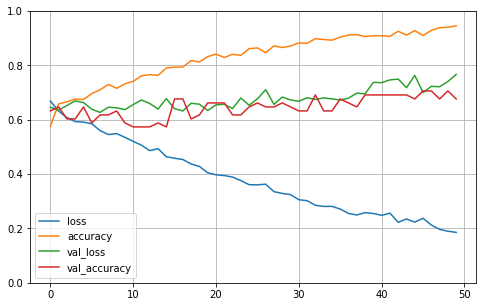

In [ ]:
GS_model = create_final_model_for_GS()

history = GS_model.fit(X_train, y_train, epochs = 50,validation_data=(X_val, y_val))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


In [ ]:
GS_model.summary()

Model: "sequential_112"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_224 (Dense)           (None, 300)               60300     
                                                                 
 dropout_112 (Dropout)       (None, 300)               0         
                                                                 
 dense_225 (Dense)           (None, 1)                 301       
                                                                 
Total params: 60,601
Trainable params: 60,601
Non-trainable params: 0
_________________________________________________________________


In [ ]:
GS_model.save("my_GS_model_1")
GS_model= keras.models.load_model("my_GS_model_1")

INFO:tensorflow:Assets written to: my_GS_model_1/assets


In [ ]:
f=GS_model.evaluate(X_test, y_test)
print(f"test set loss: {f[0]}  , test set accuracy : {f[1]}")

3/3 [==============================] - 0s 4ms/step - loss: 0.7462 - accuracy: 0.7361
test set loss: 0.7461657524108887  , test set accuracy : 0.7361111044883728


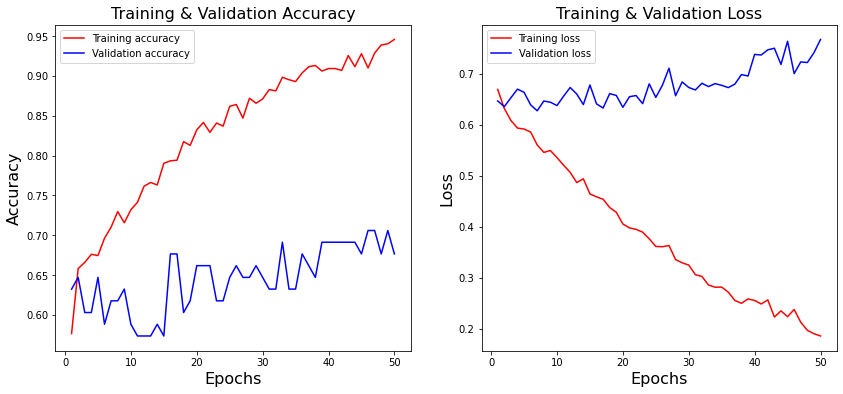

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'b', label='Training accuracy',color="red")
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'b', label='Training loss',color="red") 
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()


# **KT**

In [ ]:
X_train, X_val, y_train, y_val= train_test_split(X, y, test_size = 0.1, random_state = 1)

## **1 hidden layer**

### **Create Model for Keras Tuner**

In [ ]:
# def create_model_for_KT(hp):

#     model = Sequential()
    
#     model.add(
#         Dense(
#             units = hp.Int("units_1", min_value = 10, max_value = 500, step = 50),
#             activation = hp.Choice("activation_1", ["sigmoid", "relu"]),
#             input_shape = [200],
#         )
#     )

#     '''
#     if hp.Boolean("dropout_1"):
#         model.add(Dropout(rate = 0.2))

#     model.add(
#         Dense(
#             units = hp.Int("units_2", min_value = 10, max_value = 500, step = 50),
#             activation = hp.Choice("activation_2", ["sigmoid", "relu"]),
#         )
#     )

#     if hp.Boolean("dropout_2"):
#         model.add(Dropout(rate = 0.2))
#     '''
    
#     model.add(Dense(1, activation="sigmoid"))

#     learning_rate = hp.Choice("lr",values=[0.1,0.01,0.001,0.0001])

#     model.compile(
#         optimizer = SGD(learning_rate=learning_rate),
#         loss = "binary_crossentropy",
#         metrics = ["accuracy"],
#     )

#     return model

In [ ]:
# 1 hidden layer
def create_model_for_KT(hp):

    model = Sequential()
    
    model.add(
        Dense(
            units = hp.Int("units_1", min_value = 10, max_value = 500, step = 50),
            activation = hp.Choice("activation_1", ["sigmoid", "relu"]),
            input_shape = [200],
        )
    )


    if hp.Boolean("dropout_1"):
        model.add(Dropout(rate = 0.2))

    # model.add(
    #     Dense(
    #         units = hp.Int("units_2", min_value = 10, max_value = 500, step = 50),
    #         activation = hp.Choice("activation_2", ["sigmoid", "relu"]),
    #     )
    # )

    # if hp.Boolean("dropout_2"):
    #     model.add(Dropout(rate = 0.2))
    
    
    model.add(Dense(1, activation="sigmoid"))

    # learning_rate = hp.Choice("lr",values=[0.1,0.01,0.001,0.0001])

    model.compile(
        optimizer = SGD(),
        loss = "binary_crossentropy",
        metrics = ["accuracy"],
    )

    return model

### **Keras Tuner**

In [ ]:
# 1 hidden layer
tuner = kt.BayesianOptimization(
    hypermodel = create_model_for_KT,
    objective = "val_accuracy",
    max_trials = 50,
    executions_per_trial = 1,
    overwrite = True,
    directory = ".",
    project_name = "Neural Network",
)

tuner.search(X_train, y_train, epochs = 50, validation_data = (X_val, y_val))

Trial 50 Complete [00h 00m 07s]
val_accuracy: 0.7132866978645325

Best val_accuracy So Far: 0.7342657446861267
Total elapsed time: 00h 08m 11s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary(1)

Results summary
Results in ./Neural Network
Showing 1 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
units_1: 460
activation_1: relu
dropout_1: False
Score: 0.7342657446861267


In [ ]:
# models = tuner.get_best_models(num_models=1)
# best_model = models[0]
# best_model.build(input_shape=(None, 200))
# b=best_model.evaluate(X_test, y_test)
# print(f"test set loss: {b[0]} , test set accuracy : {b[1]}")

In [1]:
# best_model.get_config()

### **define final model model for KT**

In [ ]:
def create_final_model_for_KT():

    model = Sequential()
    
    model.add(Dense(460, activation = 'relu', input_shape = [200]))
    # model.add(Dropout(rate=0.2))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss = "binary_crossentropy", optimizer = "SGD", metrics = ["accuracy"])

    return model

Epoch 1/50
41/41 [==============================] - 1s 7ms/step - loss: 0.6843 - accuracy: 0.5444 - val_loss: 0.6824 - val_accuracy: 0.5524
Epoch 2/50
41/41 [==============================] - 0s 3ms/step - loss: 0.6750 - accuracy: 0.5927 - val_loss: 0.6733 - val_accuracy: 0.5804
Epoch 3/50
41/41 [==============================] - 0s 3ms/step - loss: 0.6675 - accuracy: 0.6067 - val_loss: 0.6661 - val_accuracy: 0.6434
Epoch 4/50
41/41 [==============================] - 0s 3ms/step - loss: 0.6604 - accuracy: 0.6363 - val_loss: 0.6570 - val_accuracy: 0.6573
Epoch 5/50
41/41 [==============================] - 0s 3ms/step - loss: 0.6531 - accuracy: 0.6324 - val_loss: 0.6535 - val_accuracy: 0.6014
Epoch 6/50
41/41 [==============================] - 0s 3ms/step - loss: 0.6493 - accuracy: 0.6347 - val_loss: 0.6487 - val_accuracy: 0.6503
Epoch 7/50
41/41 [==============================] - 0s 3ms/step - loss: 0.6446 - accuracy: 0.6519 - val_loss: 0.6428 - val_accuracy: 0.6503
Epoch 8/50
41/41 [==

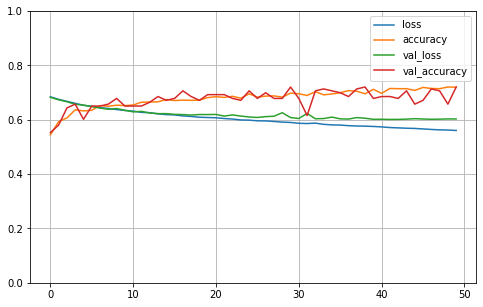

In [ ]:
KT_model_1 = create_final_model_for_KT()

history = KT_model_1.fit(X_train, y_train, epochs = 50, validation_data=(X_val,y_val))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


In [ ]:
KT_model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 460)               92460     
                                                                 
 dense_3 (Dense)             (None, 1)                 461       
                                                                 
Total params: 92,921
Trainable params: 92,921
Non-trainable params: 0
_________________________________________________________________


In [ ]:
KT_model_1.save("my_KT_model_1")
KT_model_1= keras.models.load_model("my_KT_model_1")

INFO:tensorflow:Assets written to: my_KT_model_1/assets


In [ ]:
# f=KT_model_1.evaluate(X_test, y_test)
# print(f"test set loss: {f[0]}  , test set accuracy : {f[1]}")

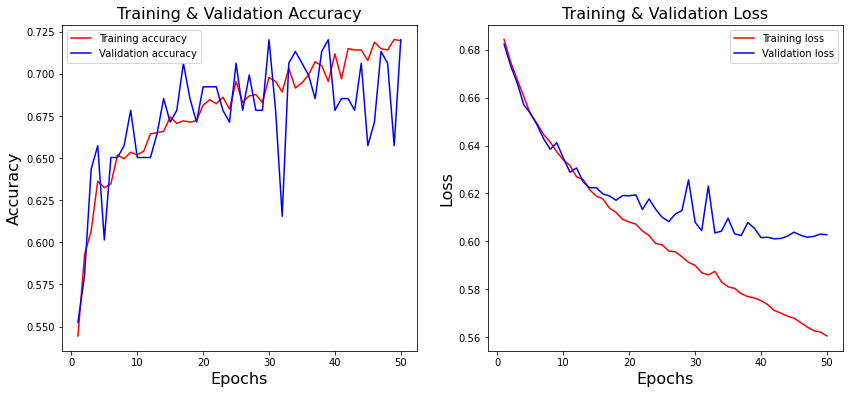

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'b', label='Training accuracy',color="red")
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'b', label='Training loss',color="red") 
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

## **2 hidden layers**

In [ ]:
X_train, X_val, y_train, y_val= train_test_split(X, y, test_size = 0.1, random_state = 1)

### **Create Model for Keras Tuner**

In [ ]:
# 2 hidden layers
def create_model_for_KT(hp):

    model = Sequential()
    
    model.add(
        Dense(
            units = hp.Int("units_1", min_value = 10, max_value = 500, step = 50),
            activation = hp.Choice("activation_1", ["sigmoid", "relu"]),
            input_shape = [200],
        )
    )

    if hp.Boolean("dropout_1"):
        model.add(Dropout(rate = 0.2))

    model.add(
        Dense(
            units = hp.Int("units_2", min_value = 10, max_value = 500, step = 50),
            activation = hp.Choice("activation_2", ["sigmoid", "relu"]),
        )
    )

    if hp.Boolean("dropout_2"):
        model.add(Dropout(rate = 0.2))

    
    model.add(Dense(1, activation="sigmoid"))

    # learning_rate = hp.Choice("lr",values=[0.1,0.01,0.001,0.0001])

    model.compile(
        optimizer = SGD(),
        loss = "binary_crossentropy",
        metrics = ["accuracy"],
    )

    return model

### **Keras Tuner**

In [ ]:
# 2 hidden layers
tuner = kt.BayesianOptimization(
    hypermodel = create_model_for_KT,
    objective = "val_accuracy",
    max_trials = 50,
    executions_per_trial = 1,
    overwrite = True,
    directory = ".",
    project_name = "Neural Network2",
)

tuner.search(X_train, y_train, epochs = 50, validation_data = (X_val, y_val))

Trial 50 Complete [00h 00m 11s]
val_accuracy: 0.6993007063865662

Best val_accuracy So Far: 0.7552447319030762
Total elapsed time: 00h 10m 44s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary(1)

Results summary
Results in ./Neural Network2
Showing 1 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
units_1: 460
activation_1: relu
dropout_1: True
units_2: 160
activation_2: relu
dropout_2: False
Score: 0.7552447319030762


In [ ]:
# models = tuner.get_best_models(num_models=1)
# best_model = models[0]
# best_model.build(input_shape=(None, 200))
# b=best_model.evaluate(X_test, y_test)
# print(f"test set loss: {b[0]} , test set accuracy : {b[1]}")

In [ ]:
best_model.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 200),
    'dtype': 'float32',
    'name': 'dense_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 200),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense',
    'trainable': True,
    'units': 460,
    'use_bias': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'sigmoid',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializ

### **define final model model for KT**

In [ ]:
def create_final_model_for_KT():

    model = Sequential()
    
    model.add(Dense(460, activation = 'relu', input_shape = [200]))
    model.add(Dropout(rate=0.2))
    model.add(Dense(160, activation="relu"))
    #  model.add(Dropout(rate=0.2))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss = "binary_crossentropy", optimizer = "SGD", metrics = ["accuracy"])

    return model

Epoch 1/50
41/41 [==============================] - 1s 7ms/step - loss: 0.6977 - accuracy: 0.5202 - val_loss: 0.6876 - val_accuracy: 0.5175
Epoch 2/50
41/41 [==============================] - 0s 4ms/step - loss: 0.6904 - accuracy: 0.5265 - val_loss: 0.6789 - val_accuracy: 0.5594
Epoch 3/50
41/41 [==============================] - 0s 4ms/step - loss: 0.6789 - accuracy: 0.5654 - val_loss: 0.6717 - val_accuracy: 0.5664
Epoch 4/50
41/41 [==============================] - 0s 4ms/step - loss: 0.6745 - accuracy: 0.5903 - val_loss: 0.6644 - val_accuracy: 0.5524
Epoch 5/50
41/41 [==============================] - 0s 4ms/step - loss: 0.6664 - accuracy: 0.6083 - val_loss: 0.6583 - val_accuracy: 0.5734
Epoch 6/50
41/41 [==============================] - 0s 5ms/step - loss: 0.6588 - accuracy: 0.6277 - val_loss: 0.6554 - val_accuracy: 0.6643
Epoch 7/50
41/41 [==============================] - 0s 4ms/step - loss: 0.6565 - accuracy: 0.6371 - val_loss: 0.6478 - val_accuracy: 0.6084
Epoch 8/50
41/41 [==

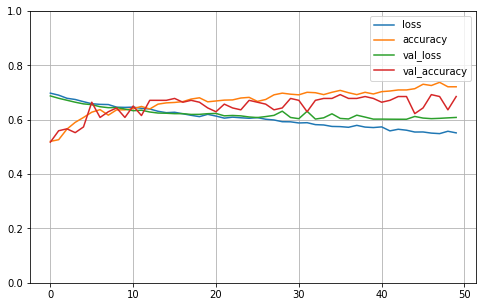

In [ ]:
KT_model_2 = create_final_model_for_KT()

history = KT_model_2.fit(X_train, y_train, epochs = 50, validation_data=(X_val,y_val))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


In [ ]:
KT_model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 460)               92460     
                                                                 
 dropout_3 (Dropout)         (None, 460)               0         
                                                                 
 dense_10 (Dense)            (None, 160)               73760     
                                                                 
 dense_11 (Dense)            (None, 1)                 161       
                                                                 
Total params: 166,381
Trainable params: 166,381
Non-trainable params: 0
_________________________________________________________________


In [ ]:
KT_model_2.save("my_KT_model_2")
KT_model_2= keras.models.load_model("my_KT_model_2")

INFO:tensorflow:Assets written to: my_KT_model_2/assets


In [ ]:
# f=KT_model_2.evaluate(X_test, y_test)
# print(f"test set loss: {f[0]}  , test set accuracy : {f[1]}")

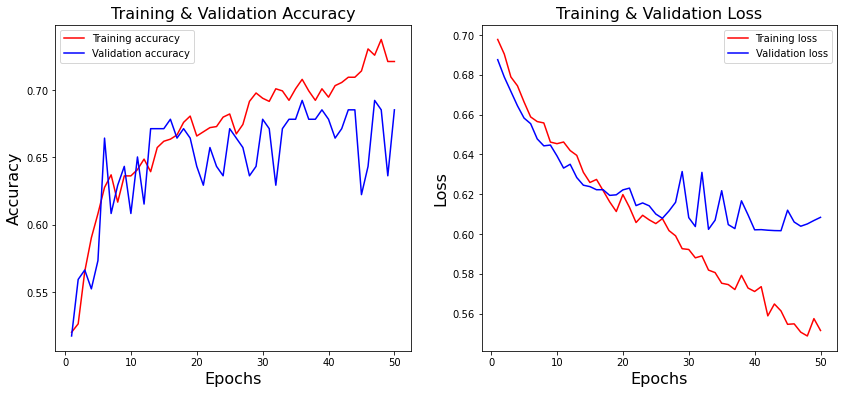

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'b', label='Training accuracy',color="red")
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'b', label='Training loss',color="red") 
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

# **Ensemble**

### **Bagging-GS**

In [ ]:
X_trainval, X_test, y_trainval, y_test= train_test_split(X, y, test_size = 0.05, random_state = 1)
X_train,X_val , y_train, y_val = train_test_split(X_trainval, y_trainval, test_size = 0.05, random_state = 1)

In [ ]:
#1 hidden layers
def create_final_model_for_GS(optimizer = 'Adam', activation_h = 'relu', init_mode_h = 'normal',init_mode_o = 'normal', dropout_rate_h =0.2 , neurons_h = 300):
    model = Sequential()
    
    model.add(Dense(neurons_h, kernel_initializer = init_mode_h, activation = activation_h, input_shape = [200]))
    model.add(Dropout(dropout_rate_h))
    model.add(Dense(1, kernel_initializer = init_mode_o, activation="sigmoid"))
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

    return model

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

model_for_bagging_GS = KerasClassifier(build_fn = create_final_model_for_GS, epochs =50)
bag_clf_GS = BaggingClassifier( base_estimator = model_for_bagging_GS, n_estimators=20, max_samples=len(X_train) , bootstrap=True , random_state=1)
bag_clf_GS.fit(X_trainval, y_trainval)


Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  after removing the cwd from sys.path.


41/41 [==============================] - 1s 2ms/step - loss: 0.6670 - accuracy: 0.5952
Epoch 2/50
41/41 [==============================] - 0s 3ms/step - loss: 0.6135 - accuracy: 0.6605
Epoch 3/50
41/41 [==============================] - 0s 3ms/step - loss: 0.5925 - accuracy: 0.6876
Epoch 4/50
41/41 [==============================] - 0s 2ms/step - loss: 0.5451 - accuracy: 0.7164
Epoch 5/50
41/41 [==============================] - 0s 2ms/step - loss: 0.5335 - accuracy: 0.7358
Epoch 6/50
41/41 [==============================] - 0s 2ms/step - loss: 0.4994 - accuracy: 0.7584
Epoch 7/50
41/41 [==============================] - 0s 3ms/step - loss: 0.4704 - accuracy: 0.7801
Epoch 8/50
41/41 [==============================] - 0s 2ms/step - loss: 0.4488 - accuracy: 0.7933
Epoch 9/50
41/41 [==============================] - 0s 3ms/step - loss: 0.4413 - accuracy: 0.7817
Epoch 10/50
41/41 [==============================] - 0s 2ms/step - loss: 0.4218 - accuracy: 0.8151
Epoch 11/50
41/41 [===========

BaggingClassifier(base_estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7fc0ec321650>,
                  max_samples=1287, n_estimators=20, random_state=1)

In [ ]:
y_pred = bag_clf_GS.predict(X_test)
print(f"test set accuracy :{accuracy_score(y_test, y_pred)}")

test set accuracy :0.7083333333333334


**out of bag**

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

model_for_bagging = KerasClassifier(build_fn = create_final_model_for_GS, epochs =50)
outbag_clf_GS= BaggingClassifier( base_estimator = model_for_bagging, n_estimators=20, max_samples=len(X_train), oob_score=True, bootstrap=True, random_state=1)
outbag_clf_GS.fit(X_trainval, y_trainval)


Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  after removing the cwd from sys.path.


41/41 [==============================] - 1s 3ms/step - loss: 0.6743 - accuracy: 0.5835
Epoch 2/50
41/41 [==============================] - 0s 2ms/step - loss: 0.6127 - accuracy: 0.6690
Epoch 3/50
41/41 [==============================] - 0s 2ms/step - loss: 0.5924 - accuracy: 0.6861
Epoch 4/50
41/41 [==============================] - 0s 2ms/step - loss: 0.5522 - accuracy: 0.7218
Epoch 5/50
41/41 [==============================] - 0s 2ms/step - loss: 0.5350 - accuracy: 0.7257
Epoch 6/50
41/41 [==============================] - 0s 2ms/step - loss: 0.5057 - accuracy: 0.7560
Epoch 7/50
41/41 [==============================] - 0s 2ms/step - loss: 0.4744 - accuracy: 0.7770
Epoch 8/50
41/41 [==============================] - 0s 2ms/step - loss: 0.4536 - accuracy: 0.7995
Epoch 9/50
41/41 [==============================] - 0s 2ms/step - loss: 0.4387 - accuracy: 0.7933
Epoch 10/50
41/41 [==============================] - 0s 2ms/step - loss: 0.4297 - accuracy: 0.8089
Epoch 11/50
41/41 [===========

BaggingClassifier(base_estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7fc0e2a0c0d0>,
                  max_samples=1287, n_estimators=20, oob_score=True,
                  random_state=1)

In [ ]:
print(f"accuracy for out-of-bag : {outbag_clf_GS.oob_score_}")

accuracy for out-of-bag : 0.6878228782287823


In [ ]:
y_pred = outbag_clf_GS.predict(X_test)
print(f"test set accuracy : {accuracy_score(y_test, y_pred)}")


test set accuracy : 0.7083333333333334


In [ ]:
outbag_clf_GS.oob_decision_function_

array([[0.38209587, 0.61790413],
       [0.50270419, 0.49729581],
       [0.0643685 , 0.9356315 ],
       ...,
       [0.15202153, 0.84797847],
       [0.22149568, 0.77850432],
       [0.75398218, 0.24601782]])

### **Bagging-KT_1** 

In [7]:
X_train, X_val, y_train, y_val= train_test_split(X, y, test_size = 0.1, random_state = 1)

In [8]:
def create_final_model_for_KT():

    model = Sequential()
    
    model.add(Dense(460, activation = 'relu', input_shape = [200]))
    # model.add(Dropout(rate=0.2))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss = "binary_crossentropy", optimizer = "SGD", metrics = ["accuracy"])

    return model

In [9]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

model_for_bagging_KT = KerasClassifier(build_fn = create_final_model_for_KT, epochs =50)
bag_clf_KT1 = BaggingClassifier( base_estimator = model_for_bagging_KT, n_estimators=20, max_samples=len(X_train) , bootstrap=True , random_state=1)
bag_clf_KT1.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  after removing the cwd from sys.path.


Epoch 1/50
41/41 [==============================] - 1s 2ms/step - loss: 0.6999 - accuracy: 0.5195
Epoch 2/50
41/41 [==============================] - 0s 2ms/step - loss: 0.6731 - accuracy: 0.6005
Epoch 3/50
41/41 [==============================] - 0s 2ms/step - loss: 0.6537 - accuracy: 0.6651
Epoch 4/50
41/41 [==============================] - 0s 2ms/step - loss: 0.6400 - accuracy: 0.6721
Epoch 5/50
41/41 [==============================] - 0s 2ms/step - loss: 0.6299 - accuracy: 0.6807
Epoch 6/50
41/41 [==============================] - 0s 2ms/step - loss: 0.6184 - accuracy: 0.6963
Epoch 7/50
41/41 [==============================] - 0s 2ms/step - loss: 0.6106 - accuracy: 0.7025
Epoch 8/50
41/41 [==============================] - 0s 2ms/step - loss: 0.6033 - accuracy: 0.7009
Epoch 9/50
41/41 [==============================] - 0s 2ms/step - loss: 0.5957 - accuracy: 0.7056
Epoch 10/50
41/41 [==============================] - 0s 2ms/step - loss: 0.5909 - accuracy: 0.7157
Epoch 11/50
41/41 [

BaggingClassifier(base_estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f922268f410>,
                  max_samples=1284, n_estimators=20, random_state=1)

In [10]:
y_pred = bag_clf_KT1.predict(X_val)
print(f"val set accuracy :{accuracy_score(y_val, y_pred)}")

val set accuracy :0.6713286713286714


**out of bag**

In [11]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

model_for_bagging = KerasClassifier(build_fn = create_final_model_for_KT, epochs =50)
outbag_clf_KT1 = BaggingClassifier( base_estimator = model_for_bagging, n_estimators=20, max_samples=len(X_train), oob_score=True, bootstrap=True, random_state=1)
outbag_clf_KT1.fit(X_train, y_train)


Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  after removing the cwd from sys.path.


41/41 [==============================] - 0s 2ms/step - loss: 0.6853 - accuracy: 0.5522
Epoch 2/50
41/41 [==============================] - 0s 2ms/step - loss: 0.6680 - accuracy: 0.6051
Epoch 3/50
41/41 [==============================] - 0s 2ms/step - loss: 0.6542 - accuracy: 0.6277
Epoch 4/50
41/41 [==============================] - 0s 2ms/step - loss: 0.6432 - accuracy: 0.6425
Epoch 5/50
41/41 [==============================] - 0s 2ms/step - loss: 0.6344 - accuracy: 0.6558
Epoch 6/50
41/41 [==============================] - 0s 2ms/step - loss: 0.6242 - accuracy: 0.6783
Epoch 7/50
41/41 [==============================] - 0s 2ms/step - loss: 0.6170 - accuracy: 0.6838
Epoch 8/50
41/41 [==============================] - 0s 2ms/step - loss: 0.6101 - accuracy: 0.6931
Epoch 9/50
41/41 [==============================] - 0s 2ms/step - loss: 0.6029 - accuracy: 0.7009
Epoch 10/50
41/41 [==============================] - 0s 2ms/step - loss: 0.5976 - accuracy: 0.6939
Epoch 11/50
41/41 [===========

BaggingClassifier(base_estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f921e25ee50>,
                  max_samples=1284, n_estimators=20, oob_score=True,
                  random_state=1)

In [12]:
print(f"accuracy for out-of-bag : {outbag_clf_KT1.oob_score_}")

accuracy for out-of-bag : 0.6378504672897196


In [13]:
y_pred = outbag_clf_KT1.predict(X_val)
print(f"val set accuracy : {accuracy_score(y_val, y_pred)}")


val set accuracy : 0.6713286713286714


In [14]:
# outbag_clf_KT1.oob_decision_function_

### **Bagging-KT_2** 

In [15]:
X_train, X_val, y_train, y_val= train_test_split(X, y, test_size = 0.1, random_state = 1)

In [16]:
def create_final_model_for_KT():

    model = Sequential()
    
    model.add(Dense(460, activation = 'relu', input_shape = [200]))
    model.add(Dropout(rate=0.2))
    model.add(Dense(160, activation="relu"))
    #  model.add(Dropout(rate=0.2))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss = "binary_crossentropy", optimizer = "SGD", metrics = ["accuracy"])

    return model

In [17]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

model_for_bagging_KT = KerasClassifier(build_fn = create_final_model_for_KT, epochs =50)
bag_clf_KT2 = BaggingClassifier( base_estimator = model_for_bagging_KT, n_estimators=20, max_samples=len(X_train) , bootstrap=True , random_state=1)
bag_clf_KT2.fit(X_train, y_train)


Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  after removing the cwd from sys.path.


41/41 [==============================] - 0s 2ms/step - loss: 0.6975 - accuracy: 0.5389
Epoch 2/50
41/41 [==============================] - 0s 2ms/step - loss: 0.6769 - accuracy: 0.5935
Epoch 3/50
41/41 [==============================] - 0s 2ms/step - loss: 0.6649 - accuracy: 0.6005
Epoch 4/50
41/41 [==============================] - 0s 2ms/step - loss: 0.6515 - accuracy: 0.6386
Epoch 5/50
41/41 [==============================] - 0s 3ms/step - loss: 0.6462 - accuracy: 0.6542
Epoch 6/50
41/41 [==============================] - 0s 2ms/step - loss: 0.6316 - accuracy: 0.6674
Epoch 7/50
41/41 [==============================] - 0s 2ms/step - loss: 0.6313 - accuracy: 0.6456
Epoch 8/50
41/41 [==============================] - 0s 2ms/step - loss: 0.6188 - accuracy: 0.6931
Epoch 9/50
41/41 [==============================] - 0s 2ms/step - loss: 0.6169 - accuracy: 0.6768
Epoch 10/50
41/41 [==============================] - 0s 2ms/step - loss: 0.6020 - accuracy: 0.6947
Epoch 11/50
41/41 [===========

BaggingClassifier(base_estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f91f5a3b750>,
                  max_samples=1284, n_estimators=20, random_state=1)

In [18]:
y_pred = bag_clf_KT2.predict(X_val)
print(f"val set accuracy :{accuracy_score(y_val, y_pred)}")

val set accuracy :0.6853146853146853


**out of bag**

In [19]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

model_for_bagging = KerasClassifier(build_fn = create_final_model_for_KT, epochs =50)
outbag_clf_KT2 = BaggingClassifier( base_estimator = model_for_bagging, n_estimators=20, max_samples=len(X_train), oob_score=True, bootstrap=True, random_state=1)
outbag_clf_KT2.fit(X_train, y_train)


Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  after removing the cwd from sys.path.


41/41 [==============================] - 0s 2ms/step - loss: 0.6838 - accuracy: 0.5483
Epoch 2/50
41/41 [==============================] - 0s 3ms/step - loss: 0.6723 - accuracy: 0.5857
Epoch 3/50
41/41 [==============================] - 0s 2ms/step - loss: 0.6559 - accuracy: 0.6371
Epoch 4/50
41/41 [==============================] - 0s 3ms/step - loss: 0.6423 - accuracy: 0.6410
Epoch 5/50
41/41 [==============================] - 0s 2ms/step - loss: 0.6342 - accuracy: 0.6643
Epoch 6/50
41/41 [==============================] - 0s 3ms/step - loss: 0.6279 - accuracy: 0.6636
Epoch 7/50
41/41 [==============================] - 0s 2ms/step - loss: 0.6144 - accuracy: 0.6939
Epoch 8/50
41/41 [==============================] - 0s 2ms/step - loss: 0.6050 - accuracy: 0.6885
Epoch 9/50
41/41 [==============================] - 0s 2ms/step - loss: 0.5995 - accuracy: 0.7103
Epoch 10/50
41/41 [==============================] - 0s 2ms/step - loss: 0.5969 - accuracy: 0.6978
Epoch 11/50
41/41 [===========

BaggingClassifier(base_estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f91f5049810>,
                  max_samples=1284, n_estimators=20, oob_score=True,
                  random_state=1)

In [20]:
print(f"accuracy for out-of-bag : {outbag_clf_KT2.oob_score_}")

accuracy for out-of-bag : 0.6573208722741433


In [21]:
y_pred = outbag_clf_KT2.predict(X_val)
print(f"val set accuracy : {accuracy_score(y_val, y_pred)}")


val set accuracy : 0.6783216783216783


In [23]:
# outbag_clf_KT2.oob_decision_function_

# **Predict**

## **GS**

In [ ]:
X_trainval, X_test, y_trainval, y_test= train_test_split(X, y, test_size = 0.05, random_state = 1)
X_train,X_val , y_train, y_val = train_test_split(X_trainval, y_trainval, test_size = 0.05, random_state = 1)

In [ ]:
X_new = X_test[:10]
y_prob_1 = GS_model.predict(X_new)
y_prob_2= bag_clf_GS.predict(X_new)


In [ ]:
print(y_prob_1.round(5))
print(y_prob_2.round(5))


[[5.1759e-01]
 [6.1392e-01]
 [2.3750e-02]
 [1.3000e-04]
 [9.7012e-01]
 [3.1430e-02]
 [2.9818e-01]
 [9.9967e-01]
 [7.5660e-01]
 [7.1370e-02]]
[0 1 0 0 1 0 0 1 1 0]


In [ ]:
seq_predictions_1 = list(map(lambda x: 0 if x<0.5 else 1, y_prob_1))
seq_predictions_2 = list(map(lambda x: 0 if x<0.5 else 1, y_prob_2))


print(f"real lables     : {list(y_test[:10])}")
print(f"GS  lables      : {(seq_predictions_1)}")
print(f"bagGS lables    : {(seq_predictions_2)}")


real lables     : [0, 1, 0, 0, 1, 1, 0, 1, 1, 0]
GS  lables      : [1, 1, 0, 0, 1, 0, 0, 1, 1, 0]
bagGS lables    : [0, 1, 0, 0, 1, 0, 0, 1, 1, 0]


In [ ]:
f=GS_model.evaluate(X_test, y_test)
print(f"test set loss: {f[0]}  , test set accuracy : {f[1]}")

3/3 [==============================] - 0s 3ms/step - loss: 0.7462 - accuracy: 0.7361
test set loss: 0.7461657524108887  , test set accuracy : 0.7361111044883728


In [ ]:
y_pred = bag_clf_GS.predict(X_test)
print(f"test set accuracy :{accuracy_score(y_test, y_pred)}")

test set accuracy :0.7083333333333334


## **KT**

In [24]:
X_train, X_val, y_train, y_val= train_test_split(X, y, test_size = 0.1, random_state = 1)

In [25]:
X_new = X_val[:10]

y_prob_1= bag_clf_KT1.predict(X_new)
y_prob_2= bag_clf_KT2.predict(X_new)


In [26]:
print(y_prob_1.round(5))
print(y_prob_2.round(5))


[0 1 0 0 1 0 0 1 1 0]
[0 1 0 0 1 0 0 1 1 0]


In [28]:
seq_predictions_1 = list(map(lambda x: 0 if x<0.5 else 1, y_prob_1))
seq_predictions_2 = list(map(lambda x: 0 if x<0.5 else 1, y_prob_2))



print(f"real lables     : {list(y_val[:10])}")
print(f"bagKT1 lables   : {(seq_predictions_1)}")
print(f"bagKT2 lables   : {(seq_predictions_2)}")




real lables     : [0, 1, 0, 0, 1, 1, 0, 1, 1, 0]
bagKT1 lables   : [0, 1, 0, 0, 1, 0, 0, 1, 1, 0]
bagKT2 lables   : [0, 1, 0, 0, 1, 0, 0, 1, 1, 0]
